In [139]:
from PBSHM_mdof.data.noise_manipulator import generate_noise
import numpy as np
import matplotlib.pyplot as plt
from PBSHM_mdof.data.process_data import compute_PSD
from PBSHM_mdof.data.data_handler import HDF5DataBuilder
from config import settings
from pathlib import Path
import h5py
from tqdm import tqdm
from pathlib import Path


In [140]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['font.size'] = 20

In [141]:
# Load the data and compute the RMS of the signal
path_generated_dataset = Path(settings.default['path']['abspath']) / Path(settings.default['path']['generated_dataset'])

RMS_list = []
with h5py.File(path_generated_dataset, 'r') as input_file:
    dh = HDF5DataBuilder(input_file)
    dt = dh.get_simulation_dt('POPULATION_1', 'default_simulation')
    iterator = dh.get_data_iterator()
    for d in tqdm(iterator):
        tdd = d['TDD']

        for k, v in tdd.items():
            acc_7 = v[:, 2 * 8 + 1]

            system_name = k
            anomaly_level = d['experiment_params']['anomaly_level']
            state = d['experiment_params']['state']
            latent_value = d['experiment_params']['latent_value']
            fr = d['resonance_frequency_data'][k]
            rms = np.sqrt(np.mean(acc_7**2))
            RMS_list.append(rms)
            


Exception ignored in: <generator object HDF5DataBuilder.get_data_iterator at 0x7efc940fb6f0>
Traceback (most recent call last):
  File "/home/yacine/Documents/PhD/Code/LocalProject/PBSHM_mdof/PBSHM_mdof/data/data_handler.py", line 186, in get_data_iterator
    sim_group = pop_group[sim_name]
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "/home/yacine/miniconda3/envs/PBSHM_mdofenv/lib/python3.10/site-packages/h5py/_hl/group.py", line 328, in __getitem__
    oid = h5o.open(self.id, self._e(name), lapl=self._lapl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5o.pyx", line 190, in h5py.h5o.open
ValueError: Not a location (invalid object ID)
2600it [01:08, 37.85it/s]


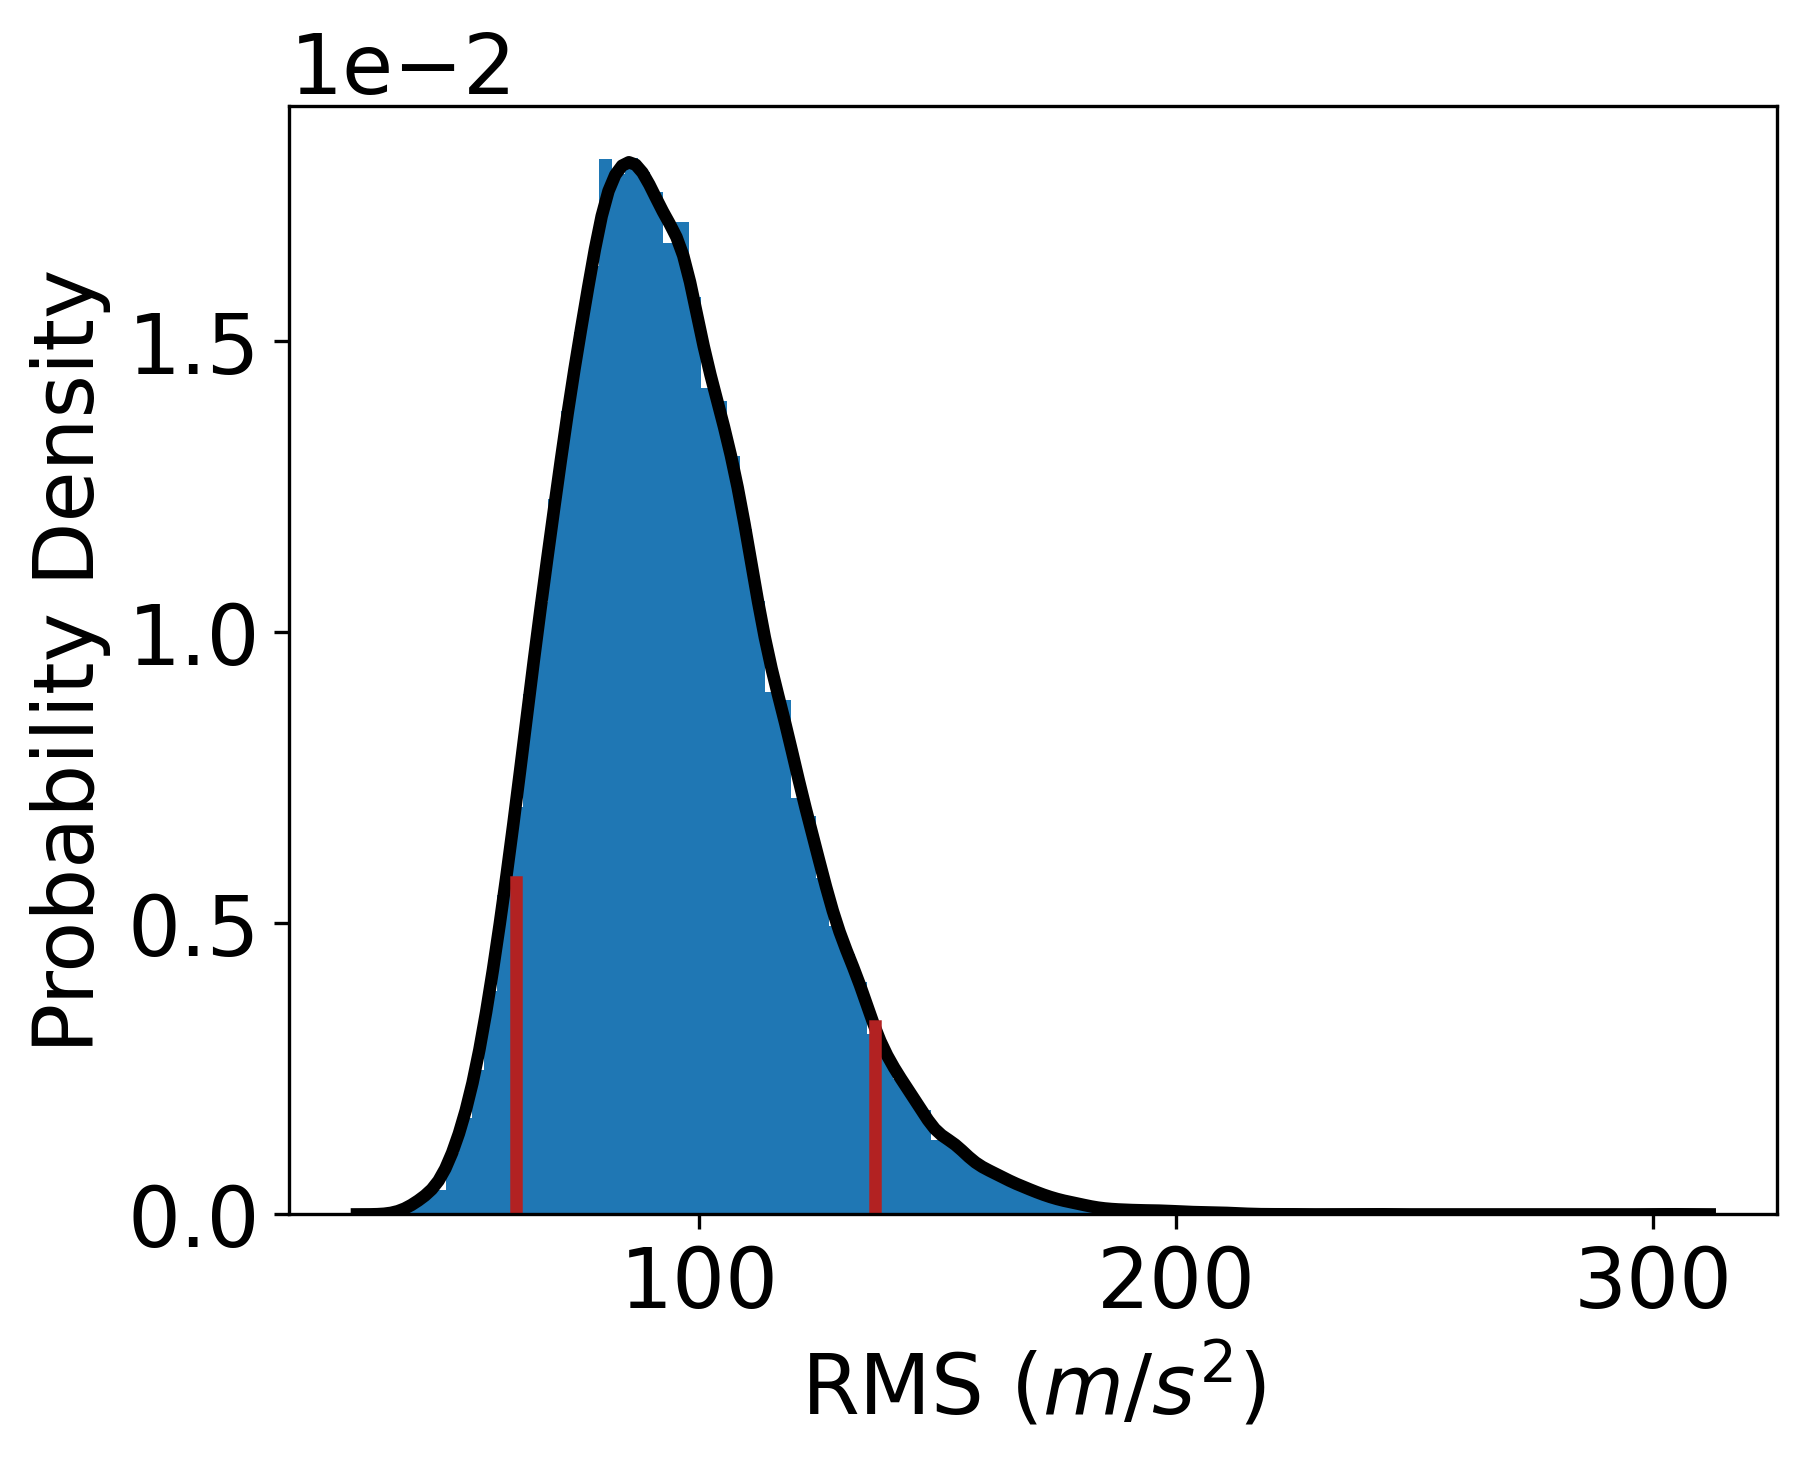

The 95 percentile is = 136.83 and the 5 percentile is = 61.57 and the median is = 92.04


In [142]:
# plot the histogram of the RMS values and kde plot and compute 95 and 5 percentile
import seaborn as sns
RMS_list = np.array(RMS_list)
plt.hist(RMS_list,bins=100,density=True)
sns.kdeplot(RMS_list,linewidth=3,color='black',label='KDE')
plt.xlabel('RMS $(m/s^2)$')
plt.ylabel('Probability Density')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
rms_95 = np.percentile(RMS_list,95)
rms_5 = np.percentile(RMS_list,5)
rms_median = np.percentile(RMS_list,50)

plt.axvline(rms_95,linewidth=3,ymax=0.17,color='firebrick',label='95 percentile')
plt.axvline(rms_5,linewidth=3,ymax=0.3,color='firebrick',label='5 percentile')

plt.savefig('RMS_histogram.png',bbox_inches='tight')
plt.show()




print(f'The 95 percentile is = {rms_95:.2f} and the 5 percentile is = {rms_5:.2f} and the median is = {rms_median:.2f}')


In [174]:
# load a signal with 95 percentile RMS and plot the PSD
path_generated_dataset = Path(settings.default['path']['abspath']) / Path(settings.default['path']['generated_dataset'])

RMS_list = []
with h5py.File(path_generated_dataset, 'r') as input_file:
    dh = HDF5DataBuilder(input_file)
    dt = dh.get_simulation_dt('POPULATION_1', 'default_simulation')
    iterator = dh.get_data_iterator()
    tdd_95 = None
    tdd_5 = None
    tdd_50 = None
    for d in tqdm(iterator):
        tdd = d['TDD']

        for k, v in tdd.items():
            acc_7 = v[:, 2 * 8 + 1]

            system_name = k
            anomaly_level = d['experiment_params']['anomaly_level']
            state = d['experiment_params']['state']
            latent_value = float(d['experiment_params']['latent_value'])
            fr = d['resonance_frequency_data'][k]
            amplitude = d['experiment_params']['amplitude']
            rms = np.sqrt(np.mean(acc_7**2))
            RMS_list.append(rms)
            
            if np.abs(rms-rms_95)<1 and tdd_95 is None and anomaly_level == '0' and np.abs(latent_value-90 )< 10 :
                print(rms,amplitude)
                tdd_95 = acc_7

            if np.abs(rms-rms_5)<1 and tdd_5 is None and anomaly_level == '0'and np.abs(latent_value-90 )< 10:
                print(rms,amplitude)
                tdd_5 = acc_7

            if np.abs(rms-rms_median)<1 and tdd_50 is None and anomaly_level == '0'and np.abs(latent_value-90 )< 10:
                print(rms,amplitude)
                tdd_50 = acc_7
        if tdd_95 is not None and tdd_5 is not None and tdd_50 is not None:
            break

Exception ignored in: <generator object HDF5DataBuilder.get_data_iterator at 0x7efc942f1e70>
Traceback (most recent call last):
  File "/home/yacine/Documents/PhD/Code/LocalProject/PBSHM_mdof/PBSHM_mdof/data/data_handler.py", line 186, in get_data_iterator
    sim_group = pop_group[sim_name]
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "/home/yacine/miniconda3/envs/PBSHM_mdofenv/lib/python3.10/site-packages/h5py/_hl/group.py", line 328, in __getitem__
    oid = h5o.open(self.id, self._e(name), lapl=self._lapl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5o.pyx", line 190, in h5py.h5o.open
ValueError: Not a location (invalid object ID)
24it [00:00, 56.09it/s]

91.50140087269793 16.831243785720318


69it [00:01, 50.86it/s]

60.743808276943014 17.605294641942173


1568it [00:40, 38.27it/s]

137.12913517153012 18.312575532811145


In [175]:
dt = 0.0025

In [176]:
tdd_5

array([ 0.00000000e+00, -2.88189770e-08, -8.21683289e-05, ...,
       -8.59629995e+01, -6.98505414e+01,  8.69994141e+00])

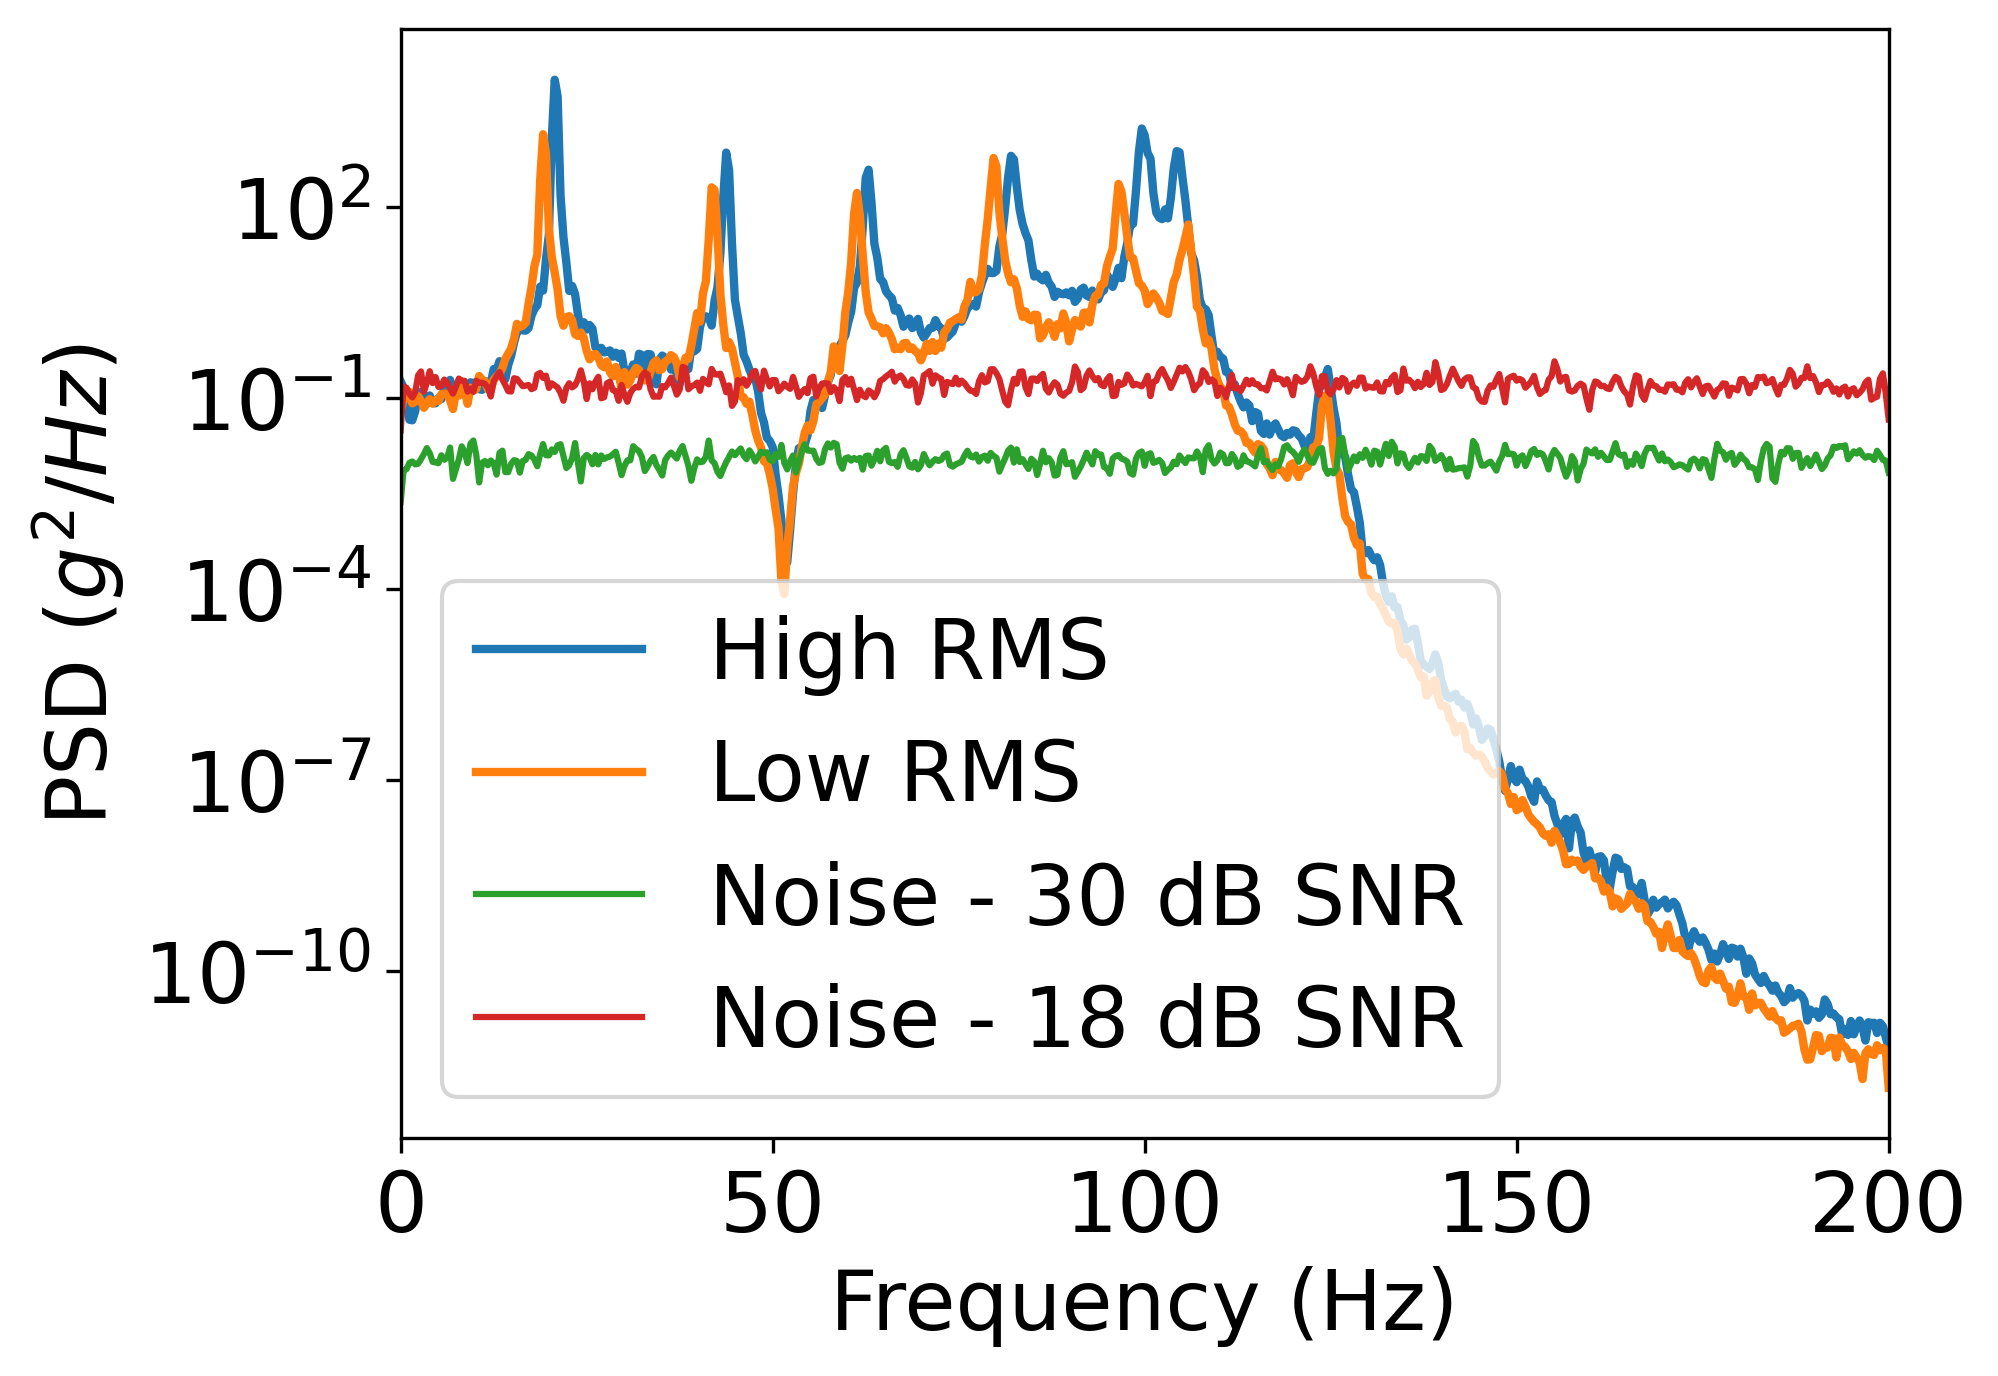

In [179]:
noise = generate_noise(SNR_dB=30,signal_length=len(tdd_5),RMS_signal=rms_5)
noise_2 = generate_noise(SNR_dB=18,signal_length=len(tdd_95),RMS_signal=rms_5)
# plot the PSD of the signal with 5 percentile RMS
f,psd_5=compute_PSD(tdd_5,dt=dt)
f,psd_95 = compute_PSD(tdd_95,dt=dt)
f,noise_psd=compute_PSD(noise,dt=dt)
f,noise_2_psd=compute_PSD(noise_2,dt=dt)
plt.plot(f,psd_95,linewidth=2,label='High RMS')
plt.plot(f,psd_5,linewidth=2,label='Low RMS')
plt.plot(f,noise_psd,label='Noise - 30 dB SNR')
plt.plot(f,noise_2_psd,label='Noise - 18 dB SNR')
plt.margins(x=0)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD $(g^2/Hz)$')
plt.yscale('log')

plt.legend()
plt.savefig('PSD.png',dpi=300,bbox_inches='tight')
plt.show()

In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
